Task 2
Let's look at a causal and stable All-pass system. It has impulse response with real coefficients and the system function has poles at $p1 = 0.9e^{j\pi}$ and $p2 = 0.8e^{j(\pi/2)}$.
We are asked to find the 3rd pole and all zeros in the z-plot. We must also find the magnitude, phase-respons and group delay of the system.

This means our system is a 3-rd order all-pass system. An all-pass system has a constant magnitude. A typical 3rd order all-pass z-plot has a pole at the Real axis, and the 2 others are anywhere, only conjugate of eachother.
Based on the info given I could see that p1 was on the real axis and p2 not, so p3 must be a conjugate of p2 and z3 conjugate of z2.
With this info, I started with plotting the z-plane and then moved on to plot the other graphs needed.

In [9]:
import numpy as np
from scipy import signal
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches

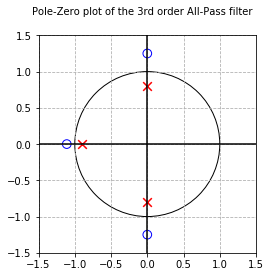

In [45]:
theta1 = np.pi
theta2 = np.pi/2
r1 = 0.9
r2 = r3 = 0.8

p1 = r1*np.exp(1j*theta1)
p2 = r2*np.exp(1j*theta2)
p3 = np.conj(p2)

z1 = 1/(np.conj(p1))
z2 = 1/(np.conj(p2))
z3 = np.conj(z2)

P = np.array([p1, p2, p3])
Z = np.array([z1, z2, z3])

fig, ax = plt.subplots(1)
fig.suptitle('Pole-Zero plot of the 3rd order All-Pass filter', fontsize=12);

ax.add_patch(mpatches.Circle((0, 0), radius=1, edgecolor='k', facecolor='None'))
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.scatter(np.real(P), np.imag(P),s=75, marker='x', color='r')
ax.scatter(np.real(Z), np.imag(Z),s=75, marker='o', edgecolor='b', facecolor='none')
ax.set_aspect(1)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(linestyle='--')

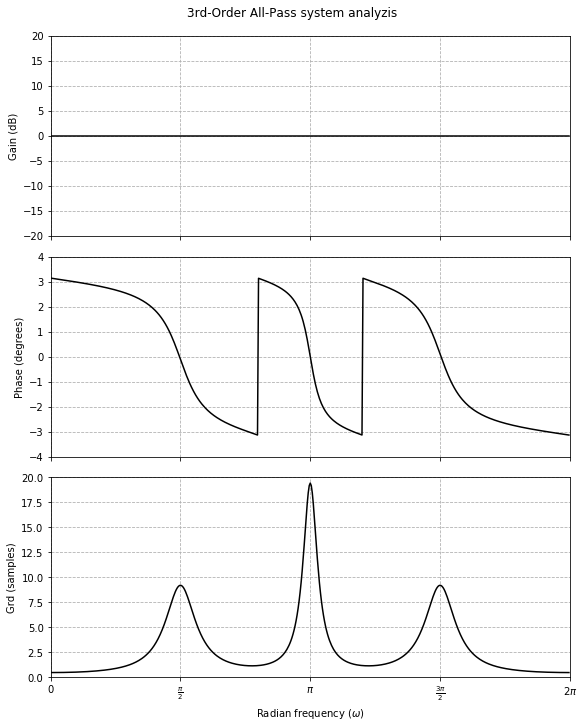

In [58]:
K = p1*p2*p3
b, a = signal.zpk2tf(Z,P,K)
w, Ha = signal.freqz(b,a,whole=True) # whole=True is added so the whole phase graph is shown, without this only one wave would show.
angleHa = np.angle(Ha)
w, grdHa = signal.group_delay((b,a),whole=True)

fig2, axs3 = plt.subplots(3,1, sharex= True,figsize=(8,10),constrained_layout=True)
fig2.suptitle('3rd-Order All-Pass system analyzis')
axs3[0].plot(w,20*np.log10(abs(Ha)),'k')
axs3[0].set_ylabel('Gain (dB)')
axs3[0].set_ylim([-20, 20])
axs3[0].grid(linestyle='--')

axs3[1].plot(w,angleHa,'k')
axs3[1].set_ylim([-4,4])
axs3[1].set_ylabel('Phase (degrees)')
axs3[1].grid(linestyle='--')

# axs[2].plot(w/np.pi,grdH)
axs3[2].plot(w,grdHa,'k')
axs3[2].set_ylabel('Grd (samples)')
axs3[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs3[2].set_ylim([0,20])
axs3[2].set_xlim([0, 2*np.pi])
axs3[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs3[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);
axs3[2].grid(linestyle='--')

We can see that the magnitude is constant with 0 gain throughout. 